## Predicting closing prices using multiple variables, LSTM Model and train-test split

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing Libraries

import pandas_datareader as web
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report

In [2]:
#Extracting data

company = '^NDX'

start = dt.datetime(2020,1,1)
end = dt.datetime(2021,12,1)

df = web.DataReader(company, 'yahoo', start, end)

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,8873.629883,8786.900391,8802.219727,8872.219727,2848370000,8872.219727
2020-01-03,8843.650391,8755.169922,8755.169922,8793.900391,2567400000,8793.900391
2020-01-06,8849.980469,8713.889648,8713.889648,8848.519531,2788120000,8848.519531
2020-01-07,8872.469727,8821.679688,8857.139648,8846.450195,2352850000,8846.450195
2020-01-08,8953.549805,8834.940430,8845.450195,8912.370117,2464090000,8912.370117
...,...,...,...,...,...,...
2021-11-24,16370.559570,16106.019531,16202.259766,16367.809570,4178630000,16367.809570
2021-11-26,16302.580078,15988.950195,16237.410156,16025.580078,3502030000,16025.580078
2021-11-29,16437.160156,16214.559570,16263.429688,16399.240234,4800570000,16399.240234


In [4]:
#Checking data frame shape

df.shape

(484, 6)

In [5]:
#Checking null values

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2020-01-02 to 2021-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       484 non-null    float64
 1   Low        484 non-null    float64
 2   Open       484 non-null    float64
 3   Close      484 non-null    float64
 4   Volume     484 non-null    int64  
 5   Adj Close  484 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 26.5 KB


<AxesSubplot:xlabel='Date'>

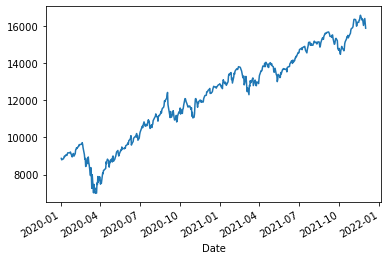

In [6]:
#Plotting hsitorical closing prices

df["Close"].plot()

In [7]:
#Setting our features and target variables

X = df.drop(columns=["Close"])
y = df["Close"]

X = np.array(X).reshape(-1,5)
y = np.array(y).reshape(-1,1)

In [8]:
#Splitting Data Into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=78)

In [9]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

# Scaling the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the MinMaxScaler object with the training target data y_train
scaler.fit(y_train)

# Scaling the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

X_train.shape

(387, 5)

In [10]:
# Defining the LSTM model.

model = Sequential()

dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=8,
    return_sequences=True,
     activation='relu',
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=4, activation='relu', return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=2))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [11]:
#Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 8)              320       
                                                                 
 dropout (Dropout)           (None, 5, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 4)              208       
                                                                 
 dropout_1 (Dropout)         (None, 5, 4)              0         
                                                                 
 lstm_2 (LSTM)               (None, 2)                 56        
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [12]:
# Compiling the model

model.compile(optimizer="adam", loss="mean_squared_error")

In [13]:
#Training the model

res = model.fit(X_train, y_train, epochs=50, batch_size=2, verbose=1)

Epoch 1/50
194/194 [==============================] - 25s 12ms/step - loss: 0.1749
Epoch 2/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0723: 0s 
Epoch 3/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0521
Epoch 4/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0391
Epoch 5/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0398
Epoch 6/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0341
Epoch 7/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0305
Epoch 8/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0237
Epoch 9/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0233
Epoch 10/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0250
Epoch 11/50
194/194 [==============================] - 2s 12ms/step - loss: 0.0190
Epoch 12/50
194/194 [==============================] - 2s 13ms/step - loss: 0.0238
Epoch 1

In [14]:
# Evaluating the model
model.evaluate(X_test, y_test)

4/4 [==============================] - 5s 5ms/step - loss: 0.0022


0.002211144659668207

In [15]:
# Making predictions
predicted = model.predict(np.array(X_test).reshape(-1,5,1))

<AxesSubplot:xlabel='Date'>

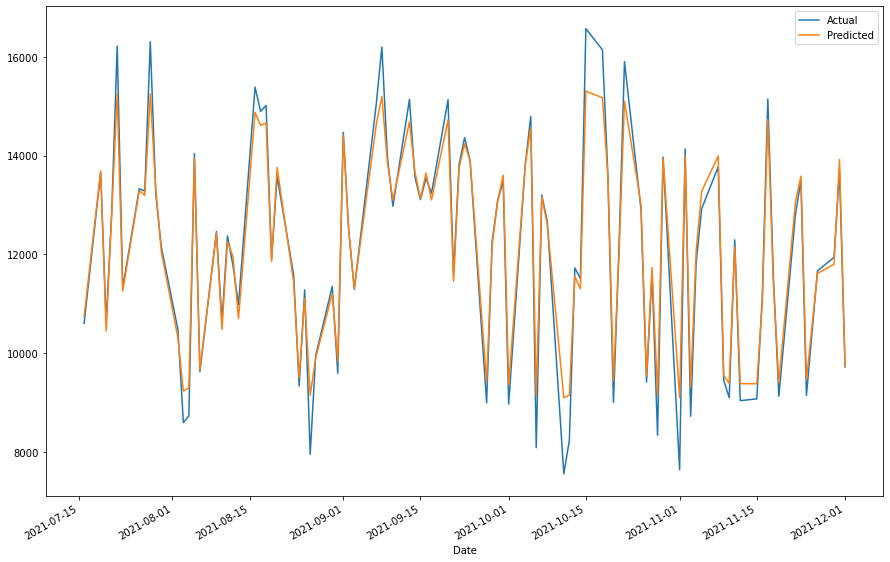

In [16]:
# Recovering the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


df1 = pd.DataFrame({
    "Actual" : real_prices.ravel(),
    "Predicted" : predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 

df1.plot(figsize=(15,10))